In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# read the data file
df = pd.read_csv(r"C:\Users\HP\Downloads\Bike_Sharing_LInearR_assignment\day.csv")

In [3]:
# Check the head of the dataset
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# dropping irrelevant columns
df.drop(['casual','registered','instant','dteday'], axis=1, inplace = True)

In [5]:
# checking dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [6]:
# replacing season columns values with names of season
df['season'] = df['season'].replace(1, 'spring')
df['season'] = df['season'].replace(2, 'summer')
df['season'] = df['season'].replace(3, 'fall')
df['season'] = df['season'].replace(4, 'winter')

In [7]:
# check the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


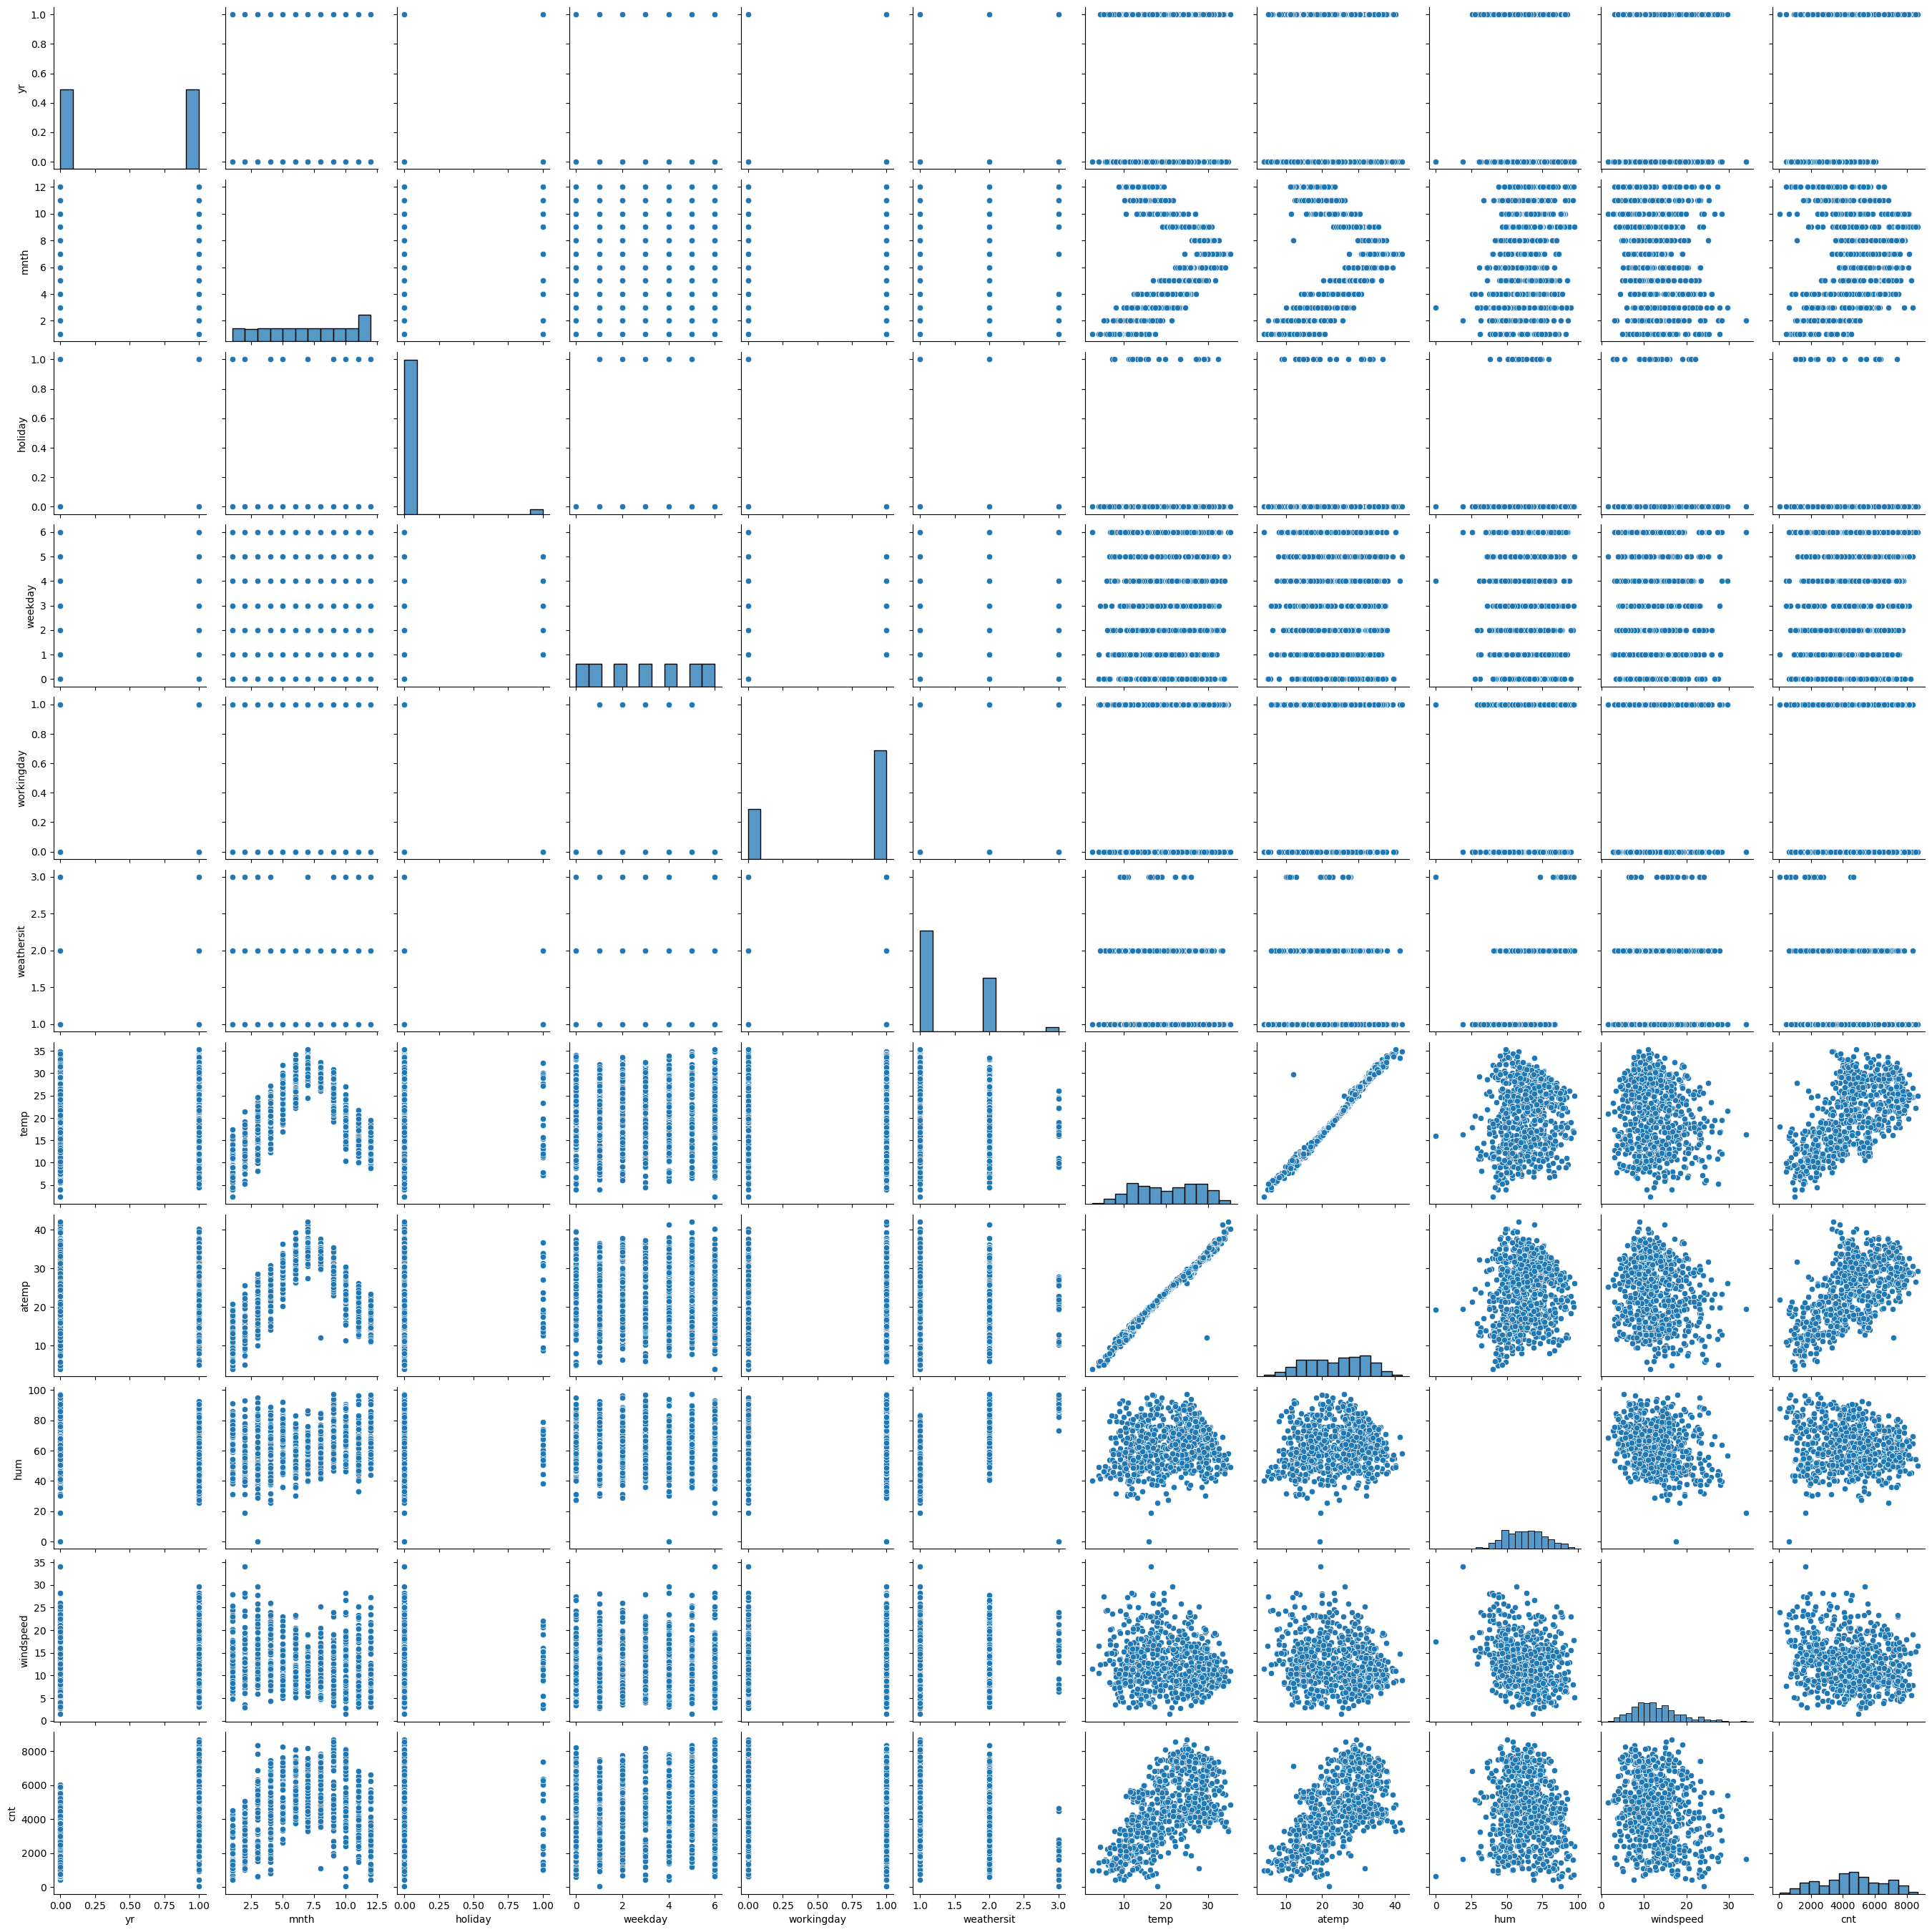

In [8]:
# visualize the numerical variables 

sns.pairplot(df)
plt.show()

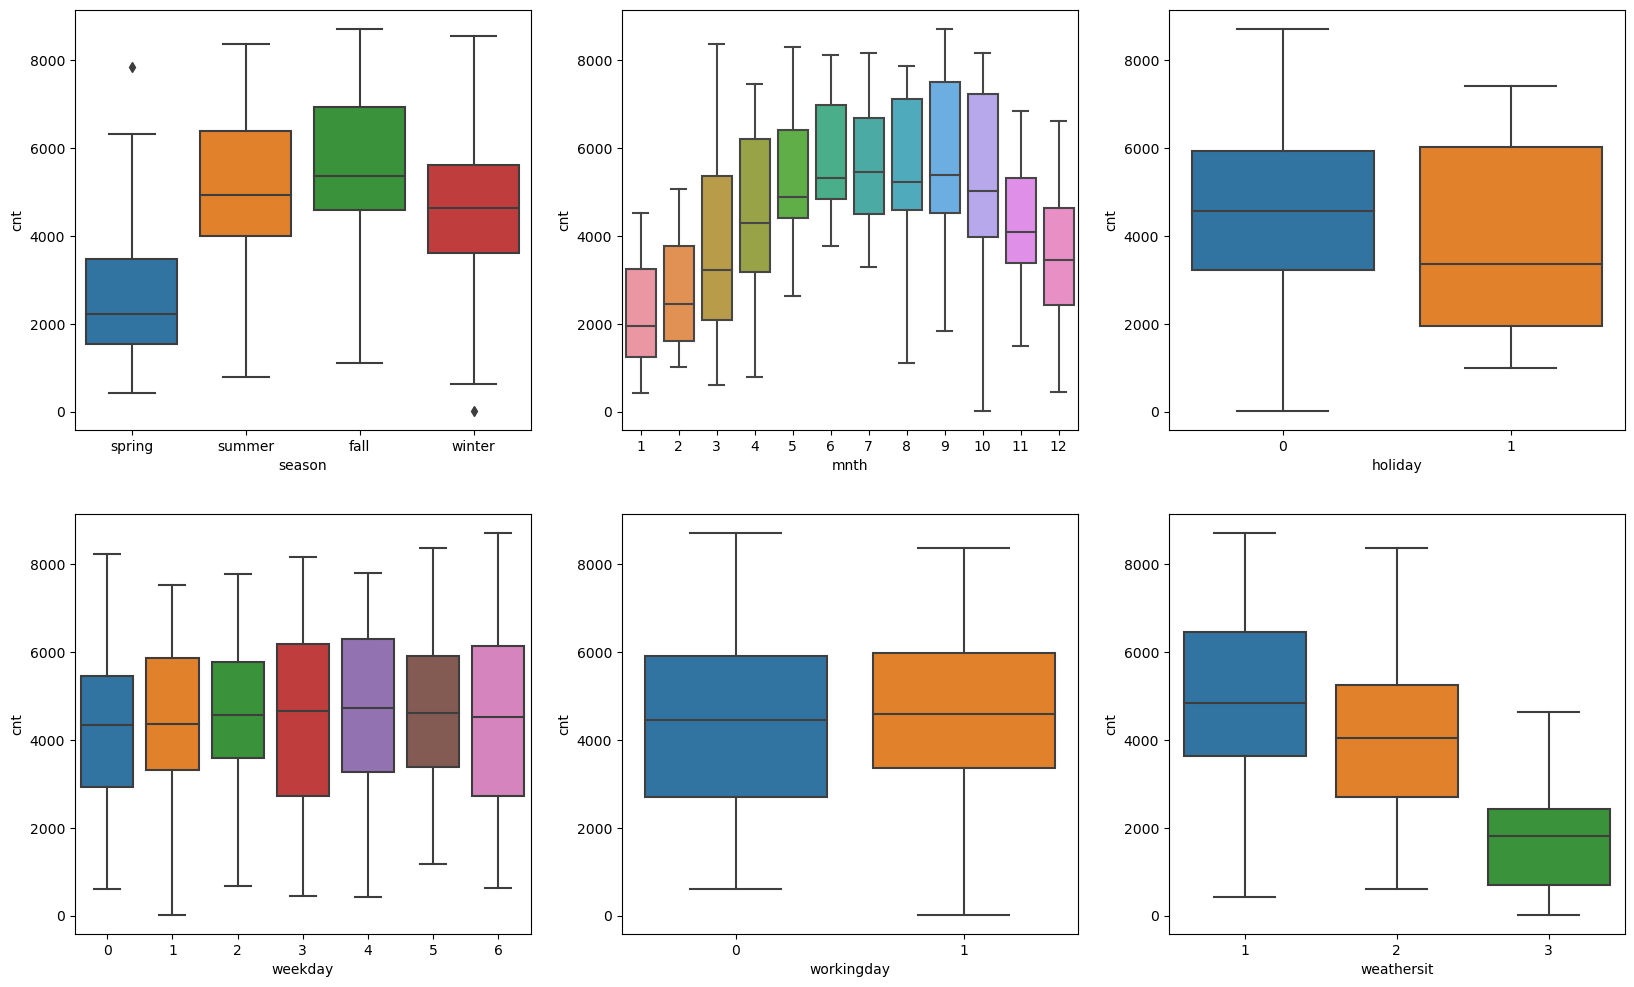

In [9]:
# visualize the categorical variables

plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = df)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)
plt.subplot(2,3,3)
sns.boxplot(x = 'holiday', y = 'cnt', data = df)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = df)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = df)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df)
plt.show()

In [10]:
# replacing values in weekday column with days name
df['weekday'] = df['weekday'].replace(0, 'Tues')
df['weekday'] = df['weekday'].replace(1, 'Wed')
df['weekday'] = df['weekday'].replace(2, 'Thurs')
df['weekday'] = df['weekday'].replace(3, 'Fri')
df['weekday'] = df['weekday'].replace(4, 'Sat')
df['weekday'] = df['weekday'].replace(5, 'Sun')
df['weekday'] = df['weekday'].replace(6, 'Mon')

In [11]:
# replacing the weathersit values with weather conditions
df['weathersit'] = df['weathersit'].replace(1, 'Cloudy')
df['weathersit'] = df['weathersit'].replace(2, 'Misty')
df['weathersit'] = df['weathersit'].replace(3, 'Snow')
df['weathersit'] = df['weathersit'].replace(4, 'Rain')

In [12]:
# check the dataset
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,1,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,Wed,1,Cloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,Thurs,1,Cloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,Fri,1,Cloudy,9.305237,11.46350,43.6957,12.522300,1600


In [13]:
# create dummies for season varaible
season = pd.get_dummies(df['season'], dtype=int, drop_first=True)

In [14]:
# check the dummies created
season.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [15]:
# merge the dummies crated and drop the season column from dataset
df = pd.concat([df, season], axis = 1)
df.drop(['season'], axis = 1, inplace = True)

In [16]:
# check the dataset
df.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,1,0,Mon,0,Misty,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,1,0,Tues,0,Misty,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,1,0,Wed,1,Cloudy,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,1,0,Thurs,1,Cloudy,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,1,0,Fri,1,Cloudy,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [17]:
# create the dummies variables for weathersit feature
weathersit = pd.get_dummies(df['weathersit'], dtype=int,drop_first = True)
df = pd.concat([df, weathersit], axis = 1)
df.drop(['weathersit'], axis = 1, inplace = True)

In [18]:
# create the dummies variables for weekday feature
weekday = pd.get_dummies(df['weekday'], dtype=int,drop_first = True)
df = pd.concat([df, weekday], axis = 1)
df.drop(['weekday'], axis = 1, inplace = True)

In [19]:
# check the dataset
df.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Misty,Snow,Mon,Sat,Sun,Thurs,Tues,Wed
0,0,1,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,1,0,1,0,0,0,0,0
1,0,1,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,1,0,0,0,0,0,1,0
2,0,1,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1
3,0,1,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0
4,0,1,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0


In [20]:
# replace the values of mnth column with month names

df['mnth'] = df['mnth'].replace(1, 'Jan')
df['mnth'] = df['mnth'].replace(2, 'Feb')
df['mnth'] = df['mnth'].replace(3, 'Mar')
df['mnth'] = df['mnth'].replace(4, 'Aprl')
df['mnth'] = df['mnth'].replace(5, 'May')
df['mnth'] = df['mnth'].replace(6, 'June')
df['mnth'] = df['mnth'].replace(7, 'July')
df['mnth'] = df['mnth'].replace(8, 'Aug')
df['mnth'] = df['mnth'].replace(9, 'Sep')
df['mnth'] = df['mnth'].replace(10, 'Oct')
df['mnth'] = df['mnth'].replace(11, 'Nov')
df['mnth'] = df['mnth'].replace(12, 'Dec')

In [21]:
# create the dummies for mnth column
mnth = pd.get_dummies(df['mnth'], dtype=int,drop_first = True)
df = pd.concat([df, mnth], axis = 1)
df.drop(['mnth'], axis = 1, inplace = True)

In [22]:
# check the dataset
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,0,0,0,0


In [23]:
# split the dataset in train and test data
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100)

In [24]:
# import the Scaling libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [26]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [27]:
# check the dataset
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sep
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,0,0,0,0,0,0


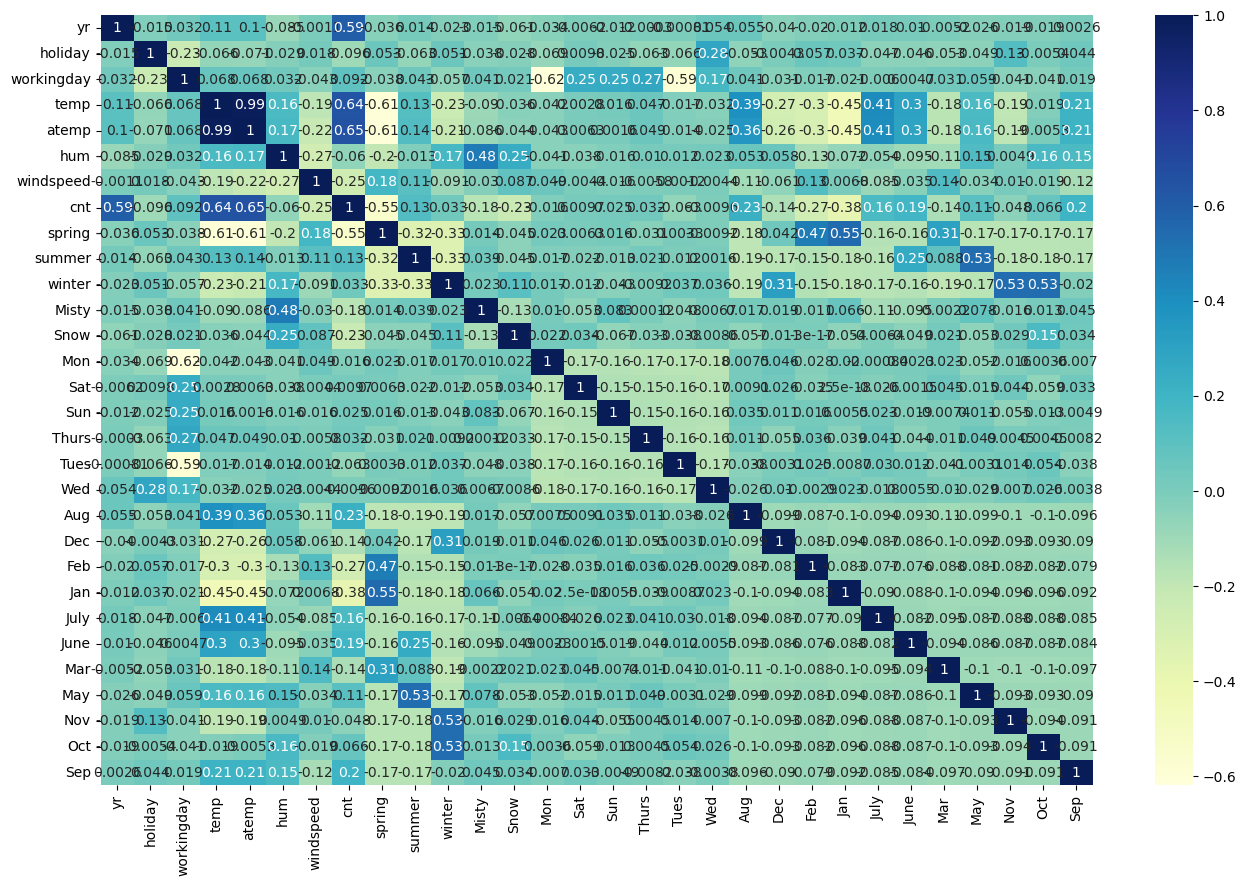

In [28]:
# plotting the heat map

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [29]:
# split the train data
y_train = df_train.pop('cnt')
X_train = df_train

In [30]:
# importing libaries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [31]:
# feature selection using RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [32]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Misty', True, 1),
 ('Snow', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 14),
 ('Sun', False, 12),
 ('Thurs', False, 11),
 ('Tues', False, 9),
 ('Wed', False, 10),
 ('Aug', False, 8),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('July', True, 1),
 ('June', False, 15),
 ('Mar', False, 16),
 ('May', False, 7),
 ('Nov', False, 3),
 ('Oct', False, 13),
 ('Sep', True, 1)]

In [33]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'Misty', 'Snow', 'Mon', 'July', 'Sep'],
      dtype='object')

In [34]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Sat', 'Sun', 'Thurs', 'Tues', 'Wed', 'Aug', 'Dec', 'Feb',
       'Jan', 'June', 'Mar', 'May', 'Nov', 'Oct'],
      dtype='object')

In [35]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [36]:
# add the constant
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [37]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [38]:
# print the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          1.13e-191
Time:                        17:43:30   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2394      0.036      6.696      0.0

In [39]:
# drop the constant for checking VIF
X_train_rfe = X_train_rfe.drop(['const'], axis=1)

In [40]:
# check the VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,28.49
3,temp,16.97
2,workingday,5.28
5,windspeed,4.72
6,spring,4.24
8,winter,3.44
7,summer,2.83
9,Misty,2.28
0,yr,2.08
11,Mon,1.97


In [41]:
# drop the feature humidity due to high VIF
X_train_new = X_train_rfe.drop(["hum"], axis = 1)

In [42]:
# add the constant 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [43]:
# run the linear regression model
lm = sm.OLS(y_train,X_train_lm).fit()

In [44]:
# print the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.73e-189
Time:                        17:43:31   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1577      0.031      5.134      0.0

In [45]:
# drop the contanst for VIF check
X_train_new1 = X_train_lm.drop(['const'], axis=1)

In [46]:
# check the VIF for new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,6.97
2,workingday,5.20
4,windspeed,4.65
5,spring,2.49
6,summer,2.32
0,yr,2.07
7,winter,1.99
10,Mon,1.96
11,July,1.58
8,Misty,1.56


In [47]:
# drop the feature temperature due to high VIF
X_train_new1 = X_train_rfe.drop(["temp"], axis = 1)

In [48]:
# add the constant
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [49]:
# run the linear regression model 3 
lm2 = sm.OLS(y_train,X_train_lm).fit()

In [50]:
# print the model summary
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Mon, 11 Dec 2023   Prob (F-statistic):          5.73e-189
Time:                        17:43:31   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1577      0.031      5.134      0.0

**Residual Analysis of the train data**

In [51]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

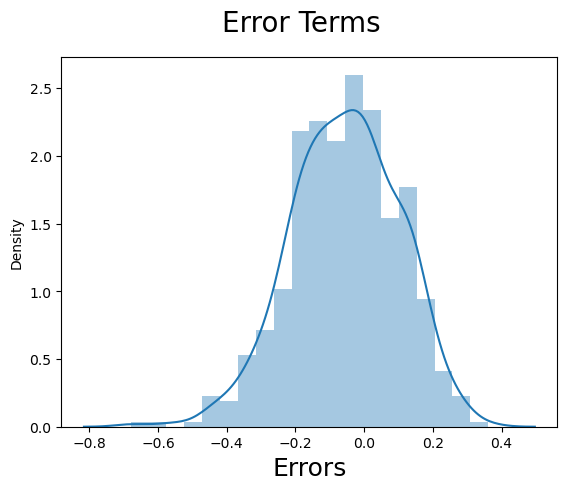

In [52]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Making Predictions

In [53]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [54]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [55]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [56]:
# Making predictions
y_pred = lm.predict(X_test_new)

Model Evaluation

Text(0, 0.5, 'y_pred')

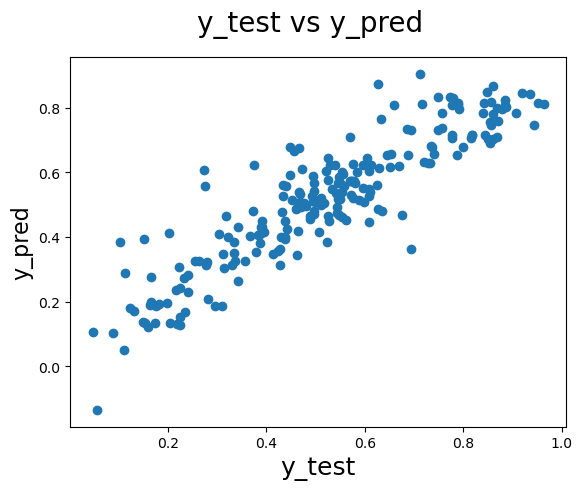

In [60]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

In [58]:
# accurary check for test data
import sklearn
sklearn.metrics.r2_score(y_test, y_pred)

0.807632599438969